In [1]:
import os

In [2]:
root_path = r"F:\KITTI"

lidar_path = r"F:\KITTI\2011_09_26\2011_09_26_drive_0009_extract\velodyne_points\data"

In [3]:
point_cloud_files = os.listdir(lidar_path)
print(len(point_cloud_files))

452


In [4]:
first_file = os.path.join(lidar_path, point_cloud_files[0])
first_file

'F:\\KITTI\\2011_09_26\\2011_09_26_drive_0009_extract\\velodyne_points\\data\\0000000000.txt'

In [5]:
# from mayavi import mlab
# mlab.init_notebook('x3d', 800, 450)
# s = mlab.test_plot3d()
# s

In [6]:
# mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

In [27]:
import matplotlib.pyplot as plt
import cv2
from kitti_lidar import KITTIObject, show_lidar_data, show_lidar_data_on_image, show_bboxes_on_image, visualize_video
from IPython import display
import os
from PIL import Image

In [8]:
from mayavi import mlab
mlab.init_notebook('ipy')
# mlab.init_notebook(backend='x3d')

Notebook initialized with ipy backend.


In [9]:
dataset = KITTIObject(r'F:\KITTI\data', 'training')

data_idx = 0

In [10]:
objects = dataset.get_label_objects(data_idx)

In [11]:
objects

In [12]:
pcd = dataset.get_lidar_data(data_idx)

In [13]:
pcd, pcd.shape

(array([[ 1.8324e+01,  4.9000e-02,  8.2900e-01,  0.0000e+00],
        [ 1.8344e+01,  1.0600e-01,  8.2900e-01,  0.0000e+00],
        [ 5.1299e+01,  5.0500e-01,  1.9440e+00,  0.0000e+00],
        ...,
        [ 3.7180e+00, -1.4060e+00, -1.7370e+00,  3.4000e-01],
        [ 3.7140e+00, -1.3910e+00, -1.7330e+00,  4.1000e-01],
        [ 3.9670e+00, -1.4740e+00, -1.8570e+00,  0.0000e+00]],
       dtype=float32),
 (115384, 4))

In [14]:
calib = dataset.get_calibration(data_idx)

In [15]:
calib

In [16]:
img = dataset.get_image(data_idx)

In [17]:
img.shape

(370, 1224, 3)

In [18]:
img_height, img_width, _ = img.shape

In [19]:
fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 500))

In [20]:
show_lidar_data(pcd, objects, calib, fig_3d, True, img_width, img_height)

In [21]:
fig_3d

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xf4\x08\x02\x00\x00\x00J"\xde/\x00\…

In [22]:
# for idx in range(len(point_cloud_files)):
for idx in range(1):
    objects = dataset.get_label_objects(idx)
    pcd = dataset.get_lidar_data(idx)
    calib = dataset.get_calibration(idx)
    img = dataset.get_image(idx)
    img_height, img_width, _ = img.shape
    fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 500))
    show_lidar_data(pcd, objects, calib, fig_3d, True, img_width, img_height)
    display.display(fig_3d)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xf4\x08\x02\x00\x00\x00J"\xde/\x00\…

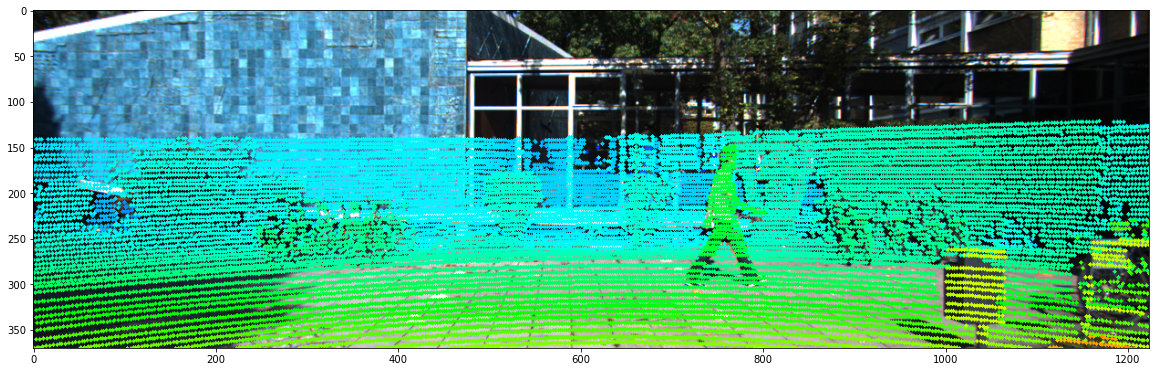

In [23]:
for idx in range(1):
    pcd = dataset.get_lidar_data(idx)
    calib = dataset.get_calibration(idx)
    img = dataset.get_image(idx)
    img_height, img_width, _ = img.shape

    lidar_on_img = show_lidar_data_on_image(pcd[:, :3], img, calib, img_width, img_height)
    lidar_on_img = cv2.cvtColor(lidar_on_img, cv2.COLOR_BGR2RGB)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.subplots()
    ax.imshow(lidar_on_img)
    plt.show()

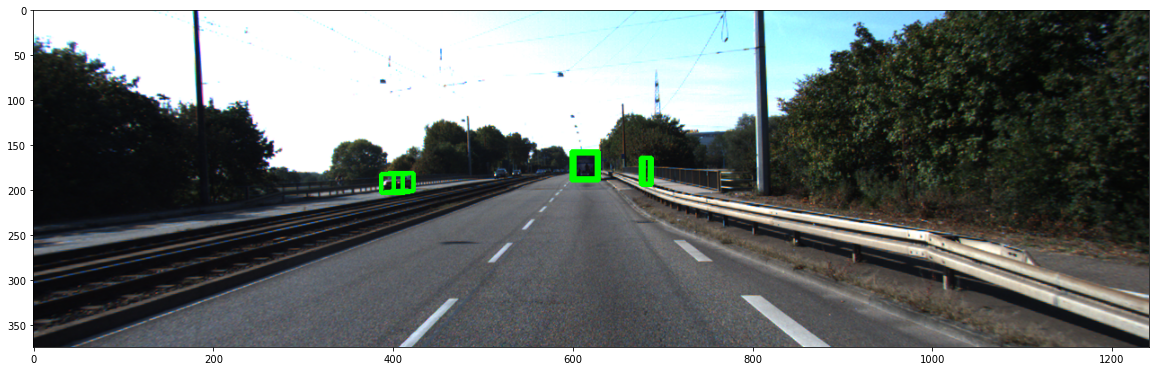

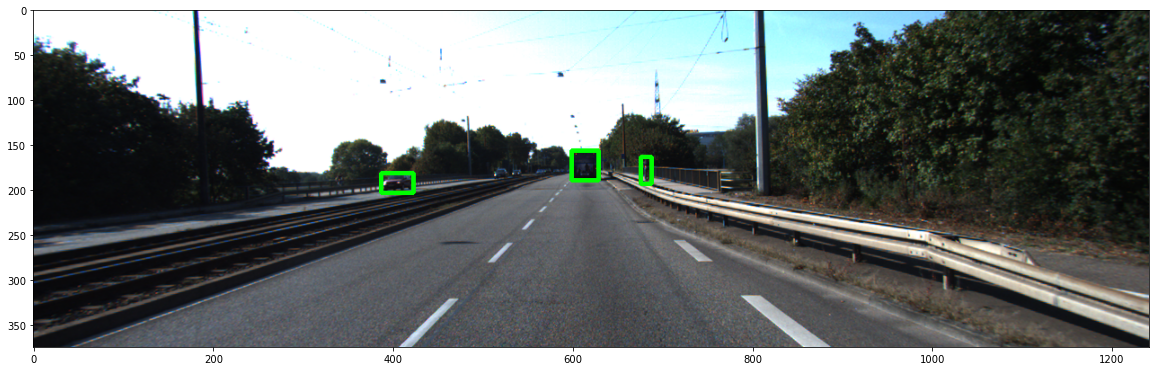

In [24]:
for idx in range(1):
    idx = 1
    
    objects = dataset.get_label_objects(idx)
    pcd = dataset.get_lidar_data(idx)
    calib = dataset.get_calibration(idx)
    img = dataset.get_image(idx)
    img_height, img_width, _ = img.shape
    
    img_bbox2d, img_bbox3d = show_bboxes_on_image(img, objects, calib)
    
    img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)
    img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)
    
    fig_bbox3d = plt.figure(figsize=(20, 20))
    ax_bbox3d = fig_bbox3d.subplots()
    ax_bbox3d.imshow(img_bbox3d)
    
    fig_bbox2d = plt.figure(figsize=(20, 20))
    ax_bbox2d = fig_bbox2d.subplots()
    ax_bbox2d.imshow(img_bbox2d)
    
    plt.show()

In [25]:
image_dir = r"F:\KITTI\2011_09_26\2011_09_26_drive_0001_sync\image_02\data"
lidar_dir = r"F:\KITTI\2011_09_26\2011_09_26_drive_0001_sync\velodyne_points\data"
calib_dir = r"F:\KITTI\2011_09_26\2011_09_26_calib\2011_09_26"
output_path = r"F:\KITTI\Scripts\LIDAR_Visualization\Output"
fig_3d = visualize_video(image_dir, lidar_dir, calib_dir, output_path)
display.display(fig_3d)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xdc\x00\x00\x03\xe8\x08\x02\x00\x00\x00Kl\xab\xb…

In [26]:
# visualize_video(image_dir, lidar_dir, calib_dir)

In [30]:
mean_height = 0
mean_width = 0
  
num_of_images = len(os.listdir(output_path)) 
# print(num_of_images) 
  
for file in os.listdir(output_path): 
    im = Image.open(os.path.join(output_path, file)) 
    width, height = im.size 
    mean_width += width 
    mean_height += height 
    # im.show()   # uncomment this for displaying the image
    
mean_width = int(mean_width / num_of_images) 
mean_height = int(mean_height / num_of_images)

print(f'Mean Width - {mean_width} Mean Height - {mean_height}')

Mean Width - 1500 Mean Height - 1000


In [32]:
def generate_video(): 
    video_name = os.path.join(output_path, 'lidata_viz.avi')
      
    images = [img for img in os.listdir(output_path) 
              if img.endswith("png")] 
     
    frame = cv2.imread(os.path.join(output_path, images[0])) 
  
    height, width, layers = frame.shape   
  
    video = cv2.VideoWriter(video_name, 0, 10, (mean_width, mean_height))  
  
    for image in images:  
        video.write(cv2.imread(os.path.join(output_path, image)))  
      
    cv2.destroyAllWindows()  
    video.release()

generate_video()